In [1]:
import numpy as np
import matplotlib.pyplot as plt
from math import floor
import math
import pandas as pd
import glob
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
import os.path
import os

# TODO CELL VELOCITIES
# TODO INSPECT THE MONOMERS; WRITE MONOMER CODE

# Setup

In [2]:
with_obstacles = False

data_from = ''
path = "Data/" + data_from

csv = ".csv"

def getConstants(config):
    name = 'constants.csv'
    constants = pd.read_csv("Data/" + config + name)
    out = {}
    out['stationary_t'] = int(constants['stationary_t'])
    out['avg'] = int(constants['avg'])
    out['delta_t'] = float(constants['delta_t'])
    out['a'] = int(constants['a'])
    out['w'] = int(constants['w'])
    out['h'] = int(constants['h'])
    out['num_particles'] = int(constants['num_particles'])
    out['m'] = int(constants['m'])
    out['k_BT'] = float(constants['k_BT'])
    out['g'] = float(constants['g'])
    if 'last_timestep' in constants.columns:
        out['last_timestep'] = constants['last_timestep']
    return out

constants = getConstants(data_from)
x_dim = constants['w']
y_dim = constants['h']
stationary = constants['stationary_t']

## Load

In [ ]:
def load_obstacles(parent):
        obstacles_path = f'{parent}/constants_obstacles.csv'
        obstacles_csv = pd.read_csv(obstacles_path)
        return obstacles_csv
    

def get_last_timestep(parent):
    if 'last_timestep' in constants:
        return constants['last_timestep']
    else:
    
        filenames_monomers = glob.glob(f'{parent}/monomers_av*.csv')
        last = filenames_monomers[-1]
        num_last = int(last.split("timestep")[1].replace(".csv", "")) - 1

        os.remove(last)

        particles_filename = f'{parent}/particles_av{constants["avg"]}_timestep0{num_last+1}.csv'
        if os.path.exists(particles_filename):
            os.remove(particles_filename)
            print("Deleted last (maybe incomplete) particles file)")

        cells_filename = f'{parent}/cells_av{constants["avg"]}_timestep0{num_last+1}.csv'
        if os.path.exists(cells_filename):
            os.remove(cells_filename)
            print("Deleted last (maybe incomplete) cells file)")
        
        constants['last_timestep'] = num_last
        df = pd.DataFrame(constants, index = [0])
        df.to_csv(f'{parent}/constants.csv', index = False)
        
        print('Saved new constants file')

        return num_last

def load_monomers(parent, constants):
    monomers_t = []

    # Loading particles
    print('Loading Monomers ..')
    filenames_monomers = glob.glob(f'{parent}/monomers_av*.csv')
    for it, file in enumerate(filenames_monomers):
        monomers_t.append(pd.read_csv(file))
        if (it % 500 == 0):
            print('--loaded {}'.format(it))
    print('Monomers loaded and saved!\n')
    # Monomers loaded
    return monomers_t


def load_particles(parent):
    particles_stationary = pd.read_csv(f'{parent}/particles_av{constants["avg"]}_timestep0{stationary-1}.csv')
    print('Particles loaded.\n')
    
    return particles_stationary

def load_cells(parent):
    print('Loading cells')
    cells_timesteps = []

    filenames_cells = glob.glob(f'{parent}/cells_av*.csv'.format(path))
    for it, file in enumerate(filenames_cells):
        df = pd.read_csv(file)
        cells_timesteps.append(df)
        if (it % 500 == 0):
            print('--loaded {}'.format(it))
        it += 1
    print('Cells loaded and saved!\n')
    # Cells loaded
    return cells_timesteps
    
parent_dir = 'Data'
num_timesteps = get_last_timestep(parent_dir)
monomers_t = load_monomers(parent_dir, constants)
particles = load_particles(parent_dir)
cells_timesteps = load_cells(parent_dir)
cells_timesteps[-1]['i'].unique()

obstacles = []
if (with_obstacles):
    obstacles = loadObstacles(parent_dir)

Saved new constants file
Loading Monomers ..
--loaded 0
--loaded 500
--loaded 1000
--loaded 1500
--loaded 2000
--loaded 2500
--loaded 3000
--loaded 3500
--loaded 4000
--loaded 4500
--loaded 5000
--loaded 5500
--loaded 6000
--loaded 6500
--loaded 7000
--loaded 7500
--loaded 8000
--loaded 8500
--loaded 9000
--loaded 9500
--loaded 10000
--loaded 10500
--loaded 11000
--loaded 11500
--loaded 12000
--loaded 12500
Monomers loaded and saved!

Particles loaded.

Loading cells
--loaded 0
--loaded 500
--loaded 1000
--loaded 1500


# Plot

In [10]:
x_region = (100, 200)
y_region = (0, y_dim)

def process_plotdata(x_region, y_region):
    x0_obstacles = x_region[0]
    x1_obstacles = x_region[1]
    y0_obstacles = y_region[0]
    y1_obstacles = y_region[1]
    x = np.arange(x0_obstacles, x1_obstacles)
    y = np.arange(y0_obstacles, y1_obstacles)
    X, Y = np.meshgrid(x, y)
    cells = cells_timesteps[-1].set_index(['i', 'j'])
    vx = np.array([[cells['meanX'].loc[row, col] for col in x] for row in y])
    vy = np.array([[cells['meanY'].loc[row, col] for col in x] for row in y])
    pivot = cells.reset_index().pivot(index = 'i', columns = 'j', values = 'num')
    return X, Y, vx, vy, pivot

X, Y, vx, vy, pivot = process_plotdata(x_region, y_region)
plt.scatter(cells.index[0], cells.index[1])

KeyError: (8, 105)

Plotting data ..


NameError: name 'vx' is not defined

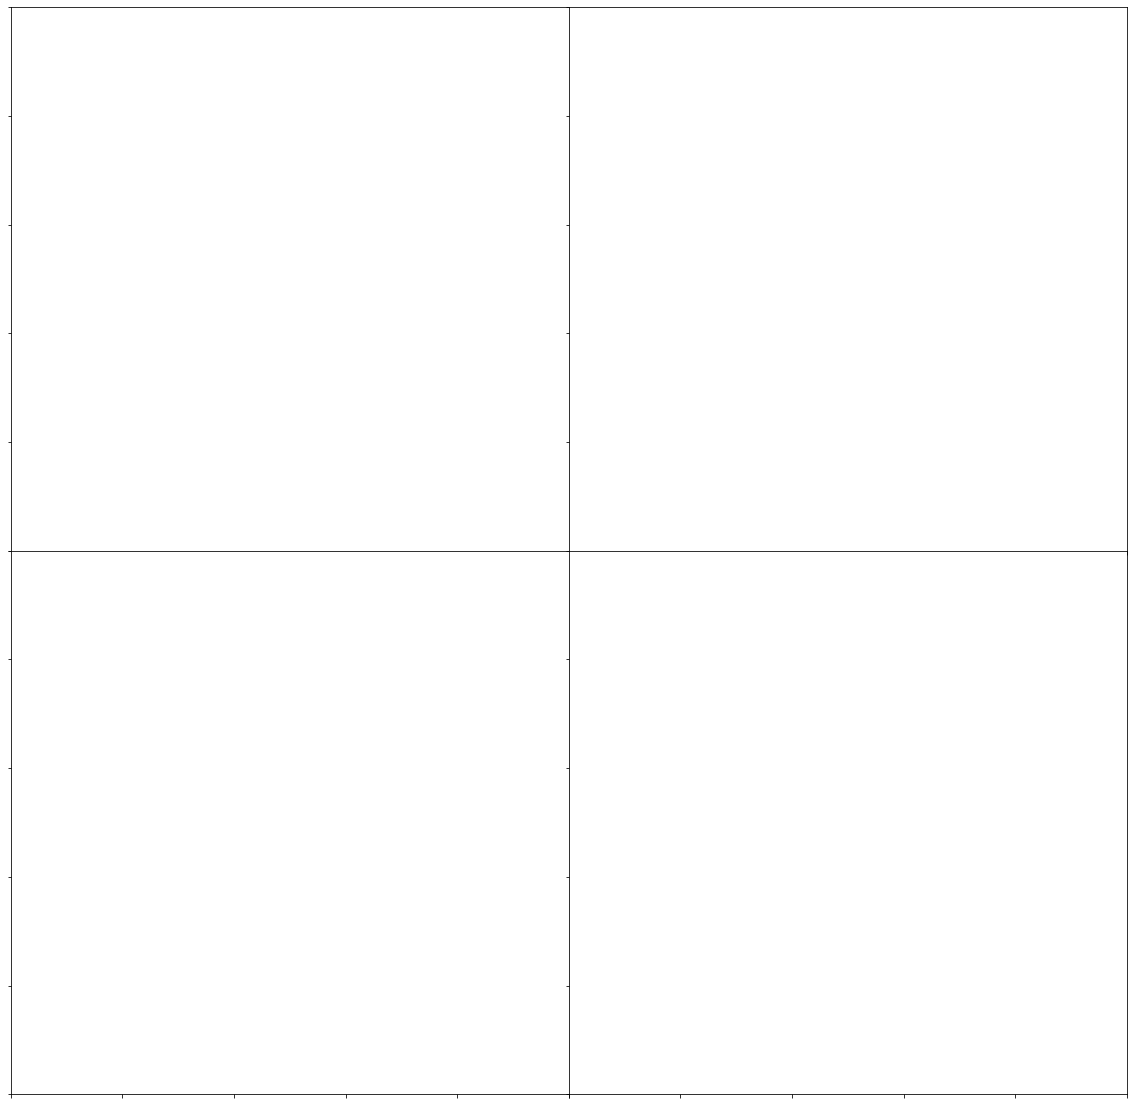

In [13]:
print('Plotting data ..')
fig = plt.figure(figsize=(20,20))
ax = [fig.add_subplot(2,2,i+1) for i in range(4)]

for a in ax:
    a.set_xticklabels([])
    a.set_yticklabels([])
    #a.set_aspect('equal')
    
fig.subplots_adjust(wspace=0, hspace=0)

color = np.sqrt(vx**2 + vy**2)
point_size = 0.3

if with_obstacles:
    for index, o in obstacles.iterrows():
        circle1 = plt.Circle((o['x'], o['y']), obstacle_radius, color = 'orange')
        circle2 = plt.Circle((o['x'], o['y']), obstacle_radius, color = 'orange')
        #circle3 = plt.Circle((o['x'], o['y']), obstacle_radius, color = 'black')
        #circles.append(circle)
        ax[1].add_artist(circle1)
        ax[2].add_artist(circle2)
        #ax[3].add_artist(circle3)
        #ax[0].xaxis.set_ticks([])

#ax[0].xaxis.set_ticks([])
#ax[0].yaxis.set_ticks([])
ax[0].quiver(X, Y, vx, vy, color)
ax[0].set(xlim=x_region, ylim=y_region)

#ax[1].xaxis.set_ticks([])
#ax[1].yaxis.set_ticks([])
ax[1].streamplot(X, Y, vx, vy, color=color, density=streamplot_density) # grid
ax[1].set(xlim=x_region, ylim=y_region)

#ax[2].xaxis.set_ticks([])
#ax[2].yaxis.set_ticks([])
particles = particles_t[-1]
ax[2].plot(particles['x'], particles['y'], "o", markersize = point_size)
monomers_T = monomers_t[-1]
ax[2].plot(monomers_T['x'], monomers_T['y'], 'o', markersize = point_size * 20, color = 'red')
ax[2].set(xlim=x_region, ylim=y_region)

#ax[3].xaxis.set_ticks([])
#ax[3].yaxis.set_ticks([])
#img = ax[3].imshow(pivot, cmap='hot')
#fig.colorbar(img, ax=ax[3], fraction=0.046, pad=0.005)
sns.heatmap(pivot, ax=ax[3], xticklabels = False, yticklabels = False, cbar_kws={"fraction": 0.046, "pad": 0.005})
ax[3].set(xlim=x_region, ylim=y_region)
#ax[3].xticks('')
#ax[3].yticks('')
ax[3].set_ylabel('')
ax[3].set_xlabel('')
#ax[1,1].imshow(pivot, cmap='hot')

plt.savefig("Assets/stationary_region.png")
#plt.close()
print('Data plotted and saved!')

# Reality Check

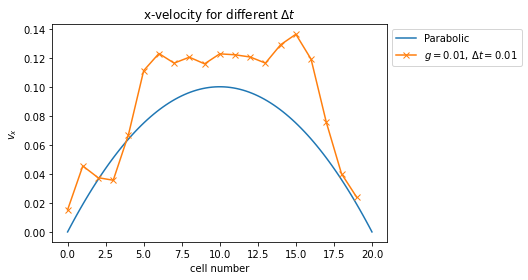

In [27]:
def viscosity(v_max, m = 1, av_N_c = 10, g = 0.01, D = 50):
    return (m * av_N_c * g * D**2) / (8 * v_max)

def parabolic_flow(y, D, v_max = 0.1):
    return (4 * v_max * (D - y) * y)/(D**2)

def getLastCell(data_from):
    path = "Data/" + data_from
    constants = getConstants(data_from)
    try:
        cells = pd.read_csv(path + f"cells_av{constants['avg']}_timestep{num_timesteps}.csv")
    except FileNotFoundError as f:
        cells = pd.read_csv(path + f"cells_av{constants['avg']}_timestep0{num_timesteps}.csv")
    return cells

def getLastCells(data_from, num):
    path = "Data/" + data_from
    constants = getConstants(data_from)
    start_timestep = num_timesteps - num
    cells = []
    for i in range(start_timestep + 1, num_timesteps + 1, 1):
        try:
            cells.append(pd.read_csv(path + f"cells_av{constants['avg']}_timestep{i}.csv"))
        except FileNotFoundError as f:
            cells.append(pd.read_csv(path + f"cells_av{constants['avg']}_timestep0{i}.csv"))
    return cells
    

y = np.linspace(0, y_dim, 100)
plt.plot(y, parabolic_flow(y, y_dim), label = 'Parabolic')

data_dirs = [''] #400x50_0.01g_0.05t/', '400x50_0.01g_0.1t/', '400x50_0.01g_0.15t/', '400x50_0.01g_0.2t/'
for config in data_dirs:
    constants = getConstants(config)
    cells = getLastCells(config, 50)
    velocities_i = pd.DataFrame()
    for t, cells_t in enumerate(cells):
        cells_t.set_index(['i', 'j'], inplace = True)
        velocities_i[f'{t}'] = cells_t['meanX'].groupby('i').mean()
    plt.plot(velocities_i.mean(axis = 1), '-x', label = '$g = {}$, $\Delta t = {}$'.format(constants['g'], constants['delta_t']))
plt.legend(bbox_to_anchor=(1,1))
plt.title('x-velocity for different $\Delta t$')
plt.ylabel('$v_x$')
plt.xlabel('cell number')
#plt.savefig('Assets/poseuille.png')
plt.show()

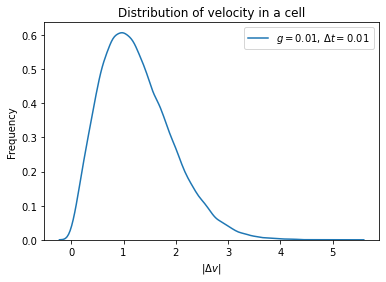

In [29]:
def getLastParticles(config):
    path = "Data/" + config
    constants = getConstants(config)
    particles = pd.read_csv(path + f"particles_av{constants['avg']}_timestep0{num_timesteps}.csv")
    return particles

def theoretical_dist(Delta_v, N_c, av_N_c = 10, m = 1, k_B = 1, T = 1):
    A = (m/(2 * math.pi * k_B * T * (1 - 1/N_c)))**(3/2)
    B = np.exp(-(m/(2 * k_B * T * (1 - 1/N_c))) * Delta_v**2)
    return A * B

def poisson_avg(Delta_v, max_sum = 1000, av_N_c = 10, m = 1, k_B = 1, T = 1):
    e = math.exp(-av_N_c)
    total = 0
    for N_c in range(2, max_sum):
        P = (av_N_c**N_c)/(math.factorial(N_c))
        N = theoretical_dist(Delta_v, N_c, m, k_B, T)
        total += P * (N)
    D = 1 - (av_N_c + 1) * e
    return e * total/D

data_dirs = [''] #400x50_0.01g_0.05t/, '400x50_0.01g_0.1t/', '400x50_0.01g_0.15t/', '400x50_0.01g_0.2t/'
fig, ax = plt.subplots(nrows = 1, ncols = 1)
for config in data_dirs:
    constants = getConstants(config)
    particles = getLastParticles(config)
    particles["i"] = (particles["y"] / constants["a"]).apply(lambda i: floor(i))
    particles["j"] = (particles["x"] / constants["a"]).apply(lambda i: floor(i))
    cells = getLastCell(config)
    complete = pd.merge(particles, cells, how = 'inner', on = ["i", "j"])
    complete["Delta_vx"] = complete["vx"] - complete["meanX"]
    complete["Delta_vy"] = complete["vy"] - complete["meanY"]
    complete["Delta_v"] = np.sqrt(complete["Delta_vx"]**2 + complete["Delta_vy"]**2)
    mid_i = (particles["i"] >= 1/4*y_dim) & (particles["i"] <= 35)
    subselection = complete.loc[mid_i]
    sns.kdeplot(subselection["Delta_v"]/ math.sqrt(constants["k_BT"] / constants["m"]),
                ax = ax, label = '$g = {}$, $\Delta t = {}$'.format(constants["g"], constants["delta_t"]))
    #ax.plot(subselection["Delta_v"], poisson_avg(subselection["Delta_v"]/ math.sqrt(constants["k_BT"] / constants["m"])), 'o')# ,ax = ax
ax.legend()
ax.set_title('Distribution of velocity in a cell')
ax.set_ylabel('Frequency')
ax.set_xlabel('$|\Delta v|$')
plt.savefig("Assets/Delta_v_dist.png")
plt.show()

# Monomer animation

In [ ]:
from matplotlib import animation

fig = plt.figure()
ax = plt.axes(xlim=(0, 400), ylim=(0, 20))

point_size = 3
df = monomers_t[0]
scatter, = ax.plot(df['x'], df['y'], 'o', markersize = point_size, color = 'red')

# animation function.  This is called sequentially
def animate(it):
    df = monomers_t[it]
    scatter.set_xdata(df['x'])
    scatter.set_ydata(df['y'])
    if (it % 100 == 0):
        print('--Created {} frame.\n'.format(it))
    return scatter,

anim = animation.FuncAnimation(fig, animate, #init_func=init,
                               frames=len(monomers_t), blit=True)

anim.save('./Assets/monomer_animation.mp4', fps=5, extra_args=['-vcodec', 'libx264'])
print('Animated and saved!')

plt.show()
#plt.close()

KeyboardInterrupt: 

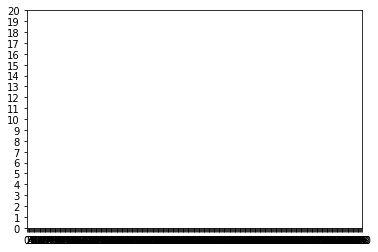

In [10]:
point_size = 3
for it, df in enumerate(monomers_t):
    scatter = plt.plot(df['x'], df['y'], 'o', markersize = point_size, color = 'red')
    plt.xlim((0, 400))
    plt.ylim((0, 20))
    plt.xticks([i for i in range(0,401)])
    plt.yticks([i for i in range(0,21)])
    #plt.grid()
    plt.savefig(f"Test/monomer_plot_{it}.png")
    plt.show()



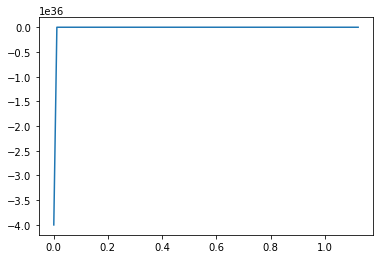

In [34]:
def truncLennardJones(d):
    tuning = 1
    diameter = 1
    f_abs = -4 * tuning * (math.pow(diameter, 12) / np.power(d, 12) + 6 * math.pow(diameter, 6) / np.power(d, 6));
    return f_abs

d = np.linspace(0.001, 2**(1/6), 100)
plt.plot(d, truncLennardJones(d), '-')
plt.show()